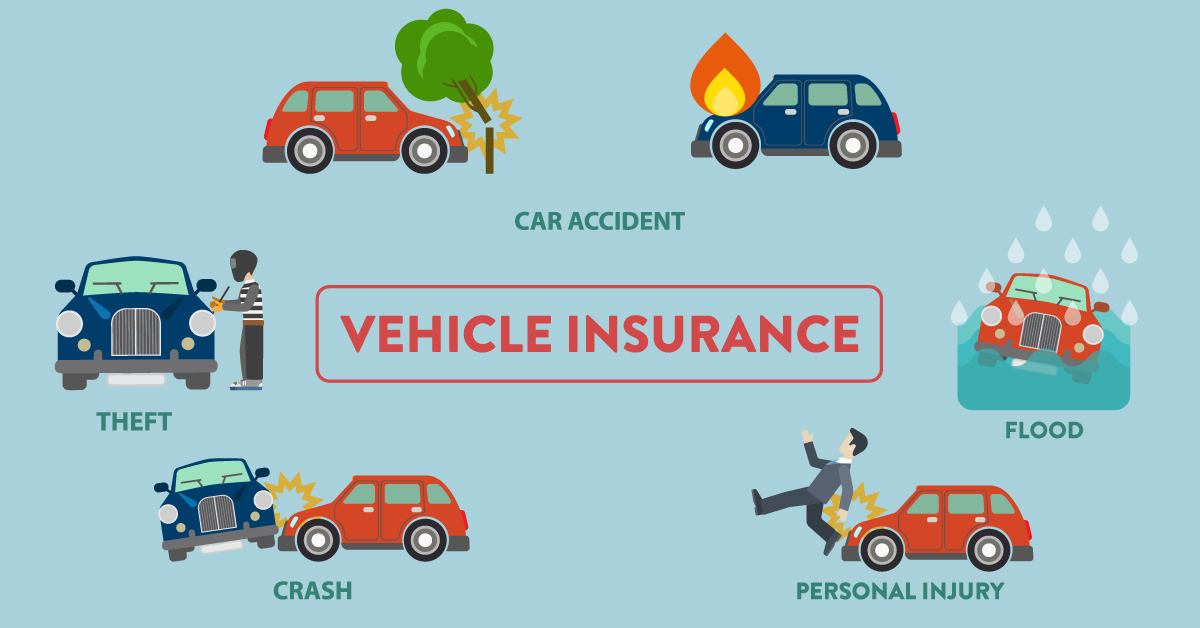

<font size="+3" color='#053c96'><b> Problem Statement</b></font>

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

<font size="+3" color='#053c96'><b>Bussiness Goal</b></font>

Build a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

In order to predict whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

<font size="+3" color='#053c96'><b>This Notebook will cover - </b></font>
### 1. Exploratory Data Analysis
#### * Analysis of Each Variable
### 2. Data Modelling and Evaluation
#### * Random Forest with Sci-Kit Learn
#### * Dense Neural Network with Tensorflow/Keras
### 3. Generation of Submission CSV

# Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

In [2]:
train=pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
test=pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')
print("Training data shape: ", train.shape) # 381109 rows, 12 columns
print("Test data shape: ", test.shape)   # 127037 rows, 11 columns (missing the response column deliberately)

Training data shape:  (381109, 12)
Test data shape:  (127037, 11)


In [3]:
train.head() # starts at id #1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test.head() # starts at id #381110

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


* The training data is 381,109 rows long, and the test dataset is 127,037.  
* The training dataset has a "response" column, but the test dataset does not.
* "Vintage" refers to how many days the customer has been with the company

## Check for missing values
* No null values

In [5]:
train.isnull().sum() # no null values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

### The data in Region_Code and Policy_Sales_Channel is in floats, but the actual values are integers, so they will be converted to int.  This is overall good practice and will make it easier to convert them to dummy variables later.

In [7]:
for column in ['Region_Code','Policy_Sales_Channel']:
    train[column] = train[column].astype('int')
    test[column] = test[column].astype('int')

# Exploratory Data Analysis

In [8]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']
train[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [9]:
for category in categorical_columns:
    print(train[category].value_counts(), '\n______________________\n')

Male      206089
Female    175020
Name: Gender, dtype: int64 
______________________

1    380297
0       812
Name: Driving_License, dtype: int64 
______________________

0    206481
1    174628
Name: Previously_Insured, dtype: int64 
______________________

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64 
______________________

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64 
______________________

0    334399
1     46710
Name: Response, dtype: int64 
______________________



## Observations:
* The customers range in age from 20 to 85 years old, and half of them are 25-49
* Half of the customers in this dataset have been with the company for 82 to 227 days
* A slight majority are male
* The vast majority have a driving license, about 99.8%
* Most vehicles are <2 years old
* Over half of vehicles have damage of some kind
* Only a little over 1 in 10 customers responded by buying vehicle insurance when asked

## Target Variable (Response)

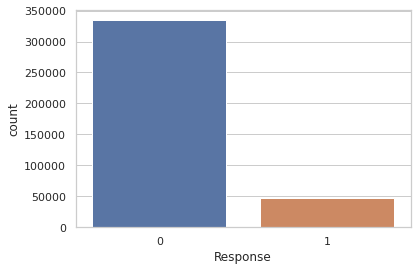

In [10]:
sns.countplot(train.Response)

In [11]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [12]:
train.Response.value_counts()[1]/(train.Response.value_counts()[1]+train.Response.value_counts()[0])

0.12256336113815208

* Only 12% of 381109 customers purchase the additional vehicle insurance when offered.
* This probably reflects most people's inherent resistance to most advertisements.  But we still have a large enough sample size of 46710 positive responses that it will be significant.  Let's see if this response rate correlates with any other variables.

## Age Distribution of Customers
* There is a clear difference in response by age.  Positive respondants tend to be 30 - 63 years old.  The youngest customers have a very low response rate.

In [13]:
print("Total age distribution:\n\n",
      train.Age.describe(),
      "\n_______________________\n\n",
      "Age distribution where Response = 1:\n\n",
      train.Age.loc[train.Response == 1].describe())

Total age distribution:

 count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64 
_______________________

 Age distribution where Response = 1:

 count    46710.000000
mean        43.435560
std         12.168924
min         20.000000
25%         35.000000
50%         43.000000
75%         51.000000
max         83.000000
Name: Age, dtype: float64


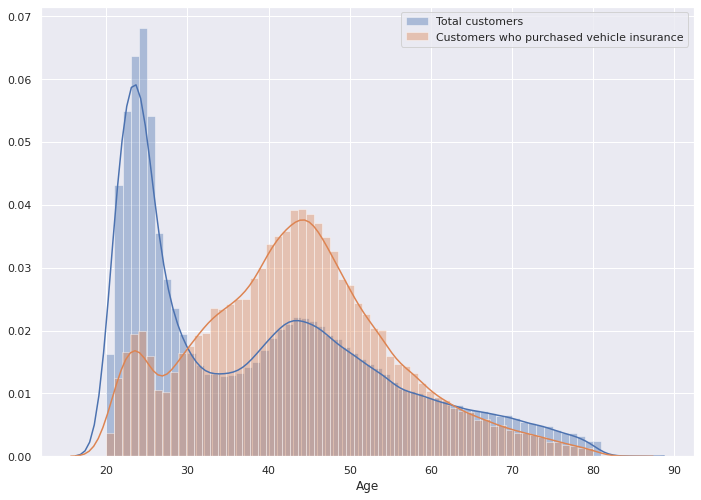

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train.Age, label = "Total customers", bins=65)
sns.distplot(train.Age.loc[train.Response == 1], label = "Customers who purchased vehicle insurance", bins=64)
plt.legend()

* Older customers buy vehicle insurance at a much higher rate than younger customers.
    Almost half of total customers are under 35, but they only make up about 1/4 of those who buy vehicle insurance.
* The spikes every 5 years are the result of combinations of 2 x 1-year intervals, and can be ignored.
* It would be the best use of resources to target customers over 35 with vehicle insurance offers, since those under 35 are less likely to be interested.
* On the chart, customers between 30 and 63 are higher-represented among those who purchase vehicle insurance.  Customers both younger and older than that range are lower-represented.

In [15]:
# There are 22 people over the age of 83, and none of them wanted vehicle insurance.  Maybe it would be too expensive for them.
# The model will likely predict a response of 0 for the very old as well as the very young.
train.loc[train.Age >83]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
617,618,Male,84,1,28,1,1-2 Year,No,49367.0,122,31,0
21886,21887,Male,84,1,47,1,1-2 Year,No,35228.0,124,136,0
47828,47829,Female,84,1,28,1,1-2 Year,Yes,43889.0,26,181,0
48875,48876,Female,85,1,45,1,1-2 Year,No,2630.0,26,102,0
49955,49956,Male,84,1,16,1,1-2 Year,No,26748.0,26,94,0
95728,95729,Female,84,1,45,1,1-2 Year,No,31835.0,13,191,0
100683,100684,Female,85,1,28,0,1-2 Year,Yes,32366.0,26,293,0
109851,109852,Female,85,1,50,0,1-2 Year,Yes,26475.0,124,114,0
130147,130148,Female,84,1,28,0,1-2 Year,Yes,52241.0,26,217,0
137703,137704,Female,85,1,28,0,1-2 Year,Yes,51045.0,124,147,0


## Age Vs Annual premium 
* Little correlation, but we will consider it in the models later

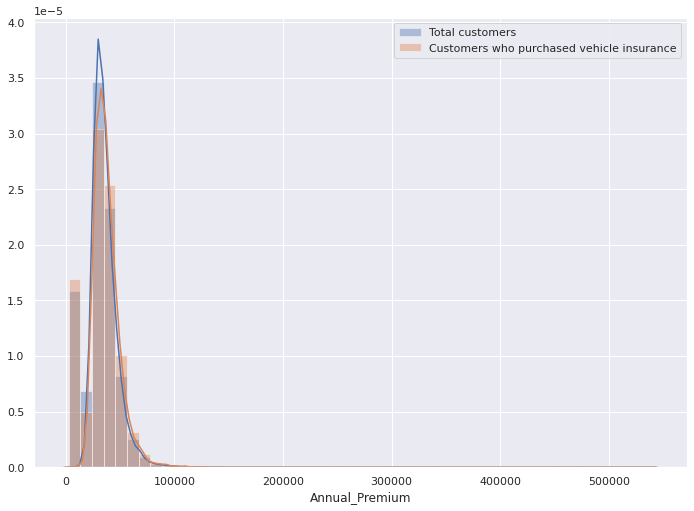

In [16]:
sns.distplot(train.Annual_Premium, label = "Total customers")
sns.distplot(train.Annual_Premium.loc[train.Response == 1], label = "Customers who purchased vehicle insurance")
plt.legend()

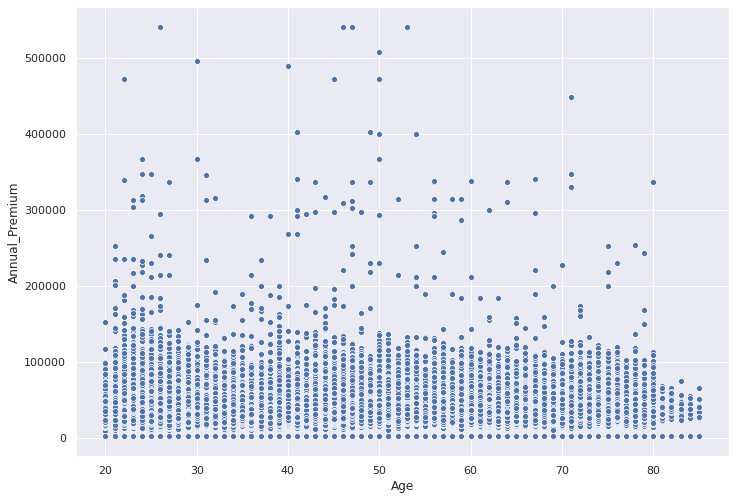

In [17]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium']) # There does not appear to be much correlation between age and annual premium

## Gender and Response
* Gender makes little difference to response, but it will be included in the models

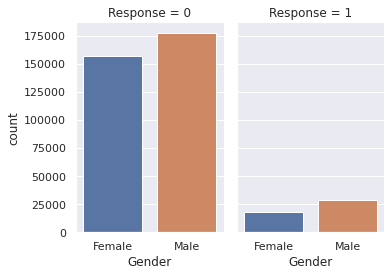

In [18]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

## Response by Previously_Insured
* People generally only buy our vehicle insurance if they don't already have vehicle insurance

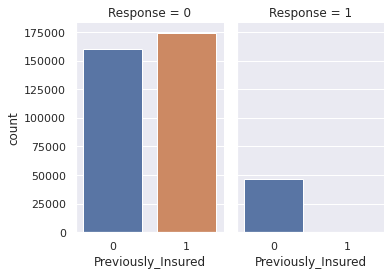

In [19]:
df=train.groupby(['Previously_Insured','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Previously_Insured", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [20]:
df

,Previously_Insured,Response,count
0,0,0,159929
1,0,1,46552
2,1,0,174470
3,1,1,158


### Only 158 people with previous insurance switched to our company.  The number is so small they do not even show up on the bar chart.  This is very useful to the model, because it will tend to rule out everyone with previous insurance, which is about half of the customers.

In [21]:
train.groupby(['Previously_Insured','Response'])['id'].count()

Previously_Insured  Response
0                   0           159929
                    1            46552
1                   0           174470
                    1              158
Name: id, dtype: int64

## Response and Vehicle age
* Response rate appears to be highest with older cars, lowest with new cars
* A large majory of the cars are <2 years old, making this an interesting sample set.  The average vehicle age in most countries is around 10 years old.

In [22]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


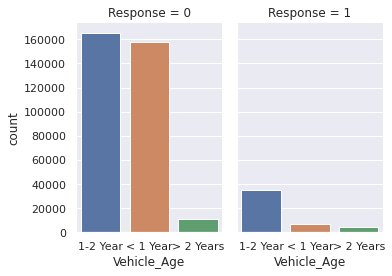

In [23]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

## Damage Vehicle and Response
* Customers with damage are far more interested in vehicle insurance.  This will also help the model rule out about half of customers.  Don't have vehicle damage?  Then we won't bother asking you if you want vehicle insurance.

In [24]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


In [25]:
df2=pd.DataFrame({'total': train['Vehicle_Damage'].value_counts(), 'Response=1':train.loc[train['Response'] == 1,'Vehicle_Damage'].value_counts()})
df2['Response Rate'] = df2['Response=1']/df2['total']
df2

,total,Response=1,Response Rate
Yes,192413,45728,0.237655
No,188696,982,0.005204


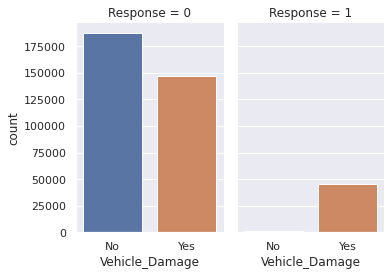

In [26]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

## Vintage

* Number of days customer has been associated with the company
* Has flat, even distribution for both total customers and customers who purchased vehicle insurance
* not expected to influence the predictive models

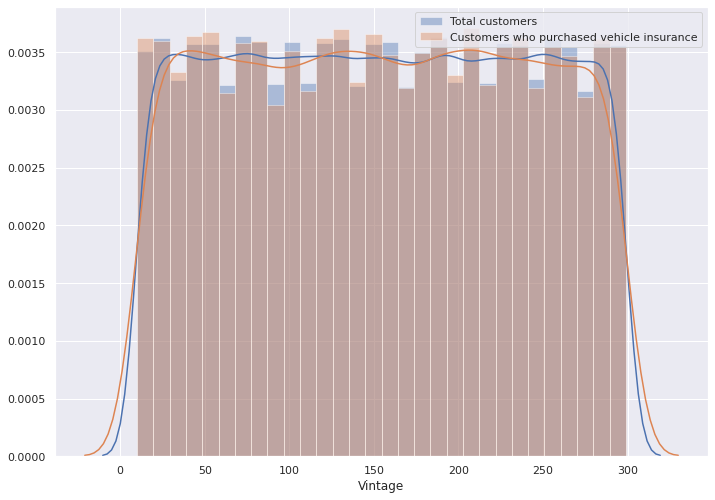

In [27]:
sns.distplot(train.Vintage, label = "Total customers", bins = 30)
sns.distplot(train.Vintage.loc[train.Response == 1], label = "Customers who purchased vehicle insurance", bins=30)
plt.legend() # the slight sawtooth pattern is just a result of binning, nothing else

## Region and Sales Channel
* Response rate varies from about 4% to 19% with region
* Response rate varies from about 2% to 19% among the major sales channels, and 0% to 100% for minor ones
This should help the model a great deal to predict a buyer.

In [28]:
df=pd.DataFrame({'total': train['Region_Code'].value_counts(), 'Response=1':train.loc[train['Response'] == 1,'Region_Code'].value_counts()})
df['Response Rate'] = df['Response=1']/df['total']
df.sort_values('Response Rate')
#As we can see, different regions have very different response rates, ranging from about 4% to 19%.  Those regions however were smaller samples than other ones, and may be outliers.

,total,Response=1,Response Rate
44,808,33,0.040842
25,2503,107,0.042749
10,4374,263,0.060128
50,10243,642,0.062677
22,1309,83,0.063407
16,2007,134,0.066766
6,6280,439,0.069904
17,2617,184,0.070310
21,4266,303,0.071027
2,4038,287,0.071075


In [29]:
df=pd.DataFrame({'total': train['Policy_Sales_Channel'].value_counts(), 'Response=1':train.loc[train['Response'] == 1,'Policy_Sales_Channel'].value_counts()})
df['Response Rate'] = df['Response=1']/df['total']
df.sort_values('Response Rate')

,total,Response=1,Response Rate
159,51,1.0,0.019608
160,21779,475.0,0.021810
108,38,1.0,0.026316
152,134784,3858.0,0.028624
151,3885,122.0,0.031403
...,...,...,...
137,8,NaN,NaN
143,1,NaN,NaN
144,1,NaN,NaN
146,16,NaN,NaN


### The NaN values are likely 0.  These sales channels likely will not make much difference because the total number of customers in them is very low as demonstrated below.

In [30]:
df.loc[df['Response Rate'].isnull(),:]

,total,Response=1,Response Rate
6,3,NaN,NaN
33,3,NaN,NaN
34,3,NaN,NaN
38,10,NaN,NaN
41,1,NaN,NaN
46,16,NaN,NaN
50,2,NaN,NaN
67,4,NaN,NaN
70,4,NaN,NaN
71,5,NaN,NaN


In [31]:
df.sort_values('Response Rate').dropna()
# Response rates by sales channel vary from 2 to 100%, though some of these are outliers due to small samples.  Channel 152 is noteworthy because it has almost
# 135,000 samples, and its response rate is only 2.86%.

,total,Response=1,Response Rate
159,51,1.0,0.019608
160,21779,475.0,0.021810
108,38,1.0,0.026316
152,134784,3858.0,0.028624
151,3885,122.0,0.031403
...,...,...,...
36,52,17.0,0.326923
27,3,1.0,0.333333
28,3,1.0,0.333333
43,1,1.0,1.000000


In [32]:
df.sort_values('total', ascending = False).dropna().iloc[:20] # Take the 20 top sales channels by number of customers.  We don't care about the puny ones.
# The top 5 channels make up about 300,000 of 382,000 total customers, and they vary widely in response rate from about 2% to 20%.  Clearly this is important information

,total,Response=1,Response Rate
152,134784,3858.0,0.028624
26,79700,15891.0,0.199385
124,73995,13996.0,0.189148
160,21779,475.0,0.021810
156,10661,2297.0,0.215458
122,9930,1720.0,0.173212
157,6684,1794.0,0.268402
154,5993,1474.0,0.245954
151,3885,122.0,0.031403
163,2893,880.0,0.304183


# Data Preprocessing for Random Forest
* Male and Female are converted to integers
* Vehicle Age is given dummy variables and converted to integer
* Vehicle damage is converted to integer.
* Age and annual premium are scaled to numbers closer to 0

In [33]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
train=pd.get_dummies(train,drop_first=True)

In [34]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [36]:
train=train.drop('id',axis=1) # drop the id column

for column in cat_feat:
    train[column] = train[column].astype('str')
    
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])


mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

In [38]:
for column in cat_feat:
    test[column] = test[column].astype('str')

In [39]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

### "id" will be kept in its own dataframe for the submission later, and not used by the model

In [40]:
id=test.id
test=test.drop('id',axis=1)

<font size="+3" color='#540b11'><b> Data Modelling and Evaluation </b> </font>

# Random Forest Classifier

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from catboost import CatBoostClassifier
#from scipy.stats import randint
import pickle
#import xgboost as xgb
#import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [42]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fmin', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [43]:
x_train.dtypes

Gender                     object
Age                       float64
Driving_License            object
Region_Code                object
Previously_Insured         object
Annual_Premium            float64
Policy_Sales_Channel       object
Vintage                   float64
Vehicle_Age_lt_1_Year      object
Vehicle_Age_gt_2_Years     object
Vehicle_Damage_Yes         object
dtype: object

### The following code optimized a random forest for accuracy.  It achieves an AUC of 0.855, which is difficult to improve upon.

In [44]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 14.4min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

## Save model

In [45]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [46]:
rf_load = pickle.load(open(filename, 'rb'))

In [47]:
rf_load

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

# Evaluate Model 

In [48]:
y_pred=model.predict(x_test)

In [49]:
y_pred[:300] # this model appears to predict 0 for everything

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
np.unique(y_pred, return_counts=True) # Yes, it predicts 0 for everything in this case (your result may be a bit different)

(array([0]), array([95278]))

In [51]:
list(y_pred).count(0)

95278

### Because the model predicts 0 for all customers, it is necessary to find another way to evaluate it.  This is where "predict_proba" comes in.  "Predict_proba" assigns each customer a probability that they will choose to buy more insurance, rather than a simple 1 or 0.  In the sorted data below, the highest probability in the dataset is 49.7%.  Your results may vary.

In [52]:
np.sort(model.predict_proba(x_test)[:,1]) # this function yields a 2d array with the probability of "0" in the 0th column and of "1" in the 1st column. Hence the [:,1]

array([0.00547242, 0.00547439, 0.00547439, ..., 0.28474428, 0.28474428,
       0.2850653 ])

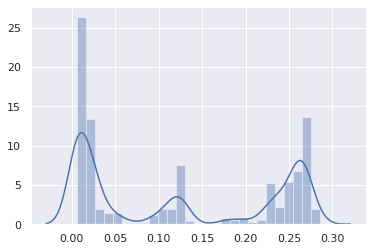

In [53]:
sns.distplot(model.predict_proba(x_test)[:,1])

### The model shows a probability distribution for all customers.  About half of customers are clustered around 0, and most of the rest are clustered around 0.3.  Since all of the probabilities assigned are <0.5, the "predict" function predicted 0 for everybody.
* Even if a customer has every trait to maximize his or her probability of buying vehicle insurance, they still have <50% chance of buying it.
* By listing each customer in order of their respective probability, the business can define a cutoff point beyond which they will decide it is not worth the cost to target those customers to offer them vehicle insurance.

## Classification Report 

In [54]:
print (classification_report(y_test, y_pred)) # By predicting 0 for everybody, the model achieves about 88% accuracy

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ROC Curve & AUC of Random forest classifier
* The ROC curve sorts all of the probabilities for each customer, then compares them to the customer's actual choices.
* Ideally the AUC would be 1.00

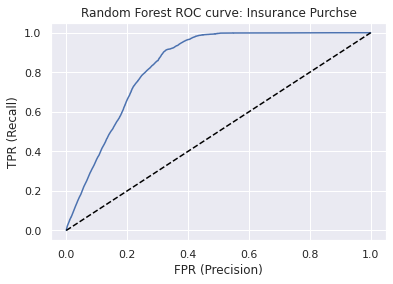

Area under curve (AUC):  0.8381396915640942


In [55]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)  

title('Random Forest ROC curve: Insurance Purchse')
xlabel('FPR (Precision)') # false positive rate
ylabel('TPR (Recall)')   # true positive rate

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) # about 0.855

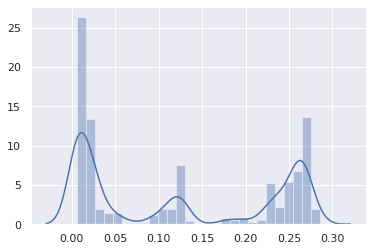

In [56]:
sns.distplot(y_score) # same plot from earlier

In [57]:
score = roc_auc_score(y_test, y_score)
print("auc-roc score on Test data",score) # 0.855

auc-roc score on Test data 0.8381396915640942


# Tensorflow Neural Network
* The test and train dataframes are reworked from the beginning to yield the proper format.  
* There are over 200 dummy variables, mostly for locations and sales channels.

In [58]:
train=pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
test=pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')

train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

for column in ['Region_Code','Policy_Sales_Channel']:
    train[column] = train[column].astype('int')
    test[column] = test[column].astype('int')
    
id=test.id  # capture id for later, test id only, for final submission
    
train=train.drop('id',axis=1) # drop the id column
test=test.drop('id',axis=1)

cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
 'Region_Code', 'Policy_Sales_Channel']

for column in cat_feat:
    train[column] = train[column].astype('str')

for column in cat_feat:
    test[column] = test[column].astype('str')

train['Age'] = train['Age']//5 # divide all ages by 5 to get them into bins of 5 years each for the dummy variables
train['Age'] = train['Age'].astype(str)

test['Age'] = test['Age']//5
test['Age'] = test['Age'].astype(str)

train['Annual_Premium'] = ((train['Annual_Premium'])//1000)**0.5//1 #bin the annual premium into about 20 bins, with smaller bin sizes for smaller amounts
train['Annual_Premium'] = train['Annual_Premium'].astype(str)
test['Annual_Premium'] = ((test['Annual_Premium'])//1000)**0.5//1
test['Annual_Premium'] = test['Annual_Premium'].astype(str)

train=pd.get_dummies(train,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [59]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

mm = MinMaxScaler()
train[['Vintage']] = mm.fit_transform(train[['Vintage']])
test[['Vintage']] = mm.fit_transform(test[['Vintage']])  # This simply reduces Vintage to smaller numbers.  They are not expected to make a difference to the model because the distribution is flat

In [60]:
print(train.shape,
      test.shape) 

#(381109, 228)
#(127037, 217)

(381109, 249) (127037, 236)


### The train and test datasets have a different number of columns, and this will not work for the model.  Thisis the result of a few of the less common regions or policy sales channels that exist in one and not the other.  We will simply delete these columns, since the number of customers in them is very low.

In [61]:
rejectColumns = []
i = 0
for name in list(train.columns):
    if name not in list(test.columns):
        print(name)
        rejectColumns.append(name)
print(i)
print(rejectColumns)

Response
Annual_Premium_22.0
Annual_Premium_23.0
Policy_Sales_Channel_104
Policy_Sales_Channel_143
Policy_Sales_Channel_144
Policy_Sales_Channel_149
Policy_Sales_Channel_27
Policy_Sales_Channel_28
Policy_Sales_Channel_41
Policy_Sales_Channel_50
Policy_Sales_Channel_67
Policy_Sales_Channel_68
Policy_Sales_Channel_75
Policy_Sales_Channel_84
0
['Response', 'Annual_Premium_22.0', 'Annual_Premium_23.0', 'Policy_Sales_Channel_104', 'Policy_Sales_Channel_143', 'Policy_Sales_Channel_144', 'Policy_Sales_Channel_149', 'Policy_Sales_Channel_27', 'Policy_Sales_Channel_28', 'Policy_Sales_Channel_41', 'Policy_Sales_Channel_50', 'Policy_Sales_Channel_67', 'Policy_Sales_Channel_68', 'Policy_Sales_Channel_75', 'Policy_Sales_Channel_84']


### Above we can see the list of columns present in training but not in test.  They are in a handful of policy sales channels and 2 extremely high annual premium bins.  They will be deleted.  It's also important to note that "Response" is included, but we definitely don't want to delete it because we will need those numbers.

In [62]:
rejectColumns.remove('Response')
rejectColumns

['Annual_Premium_22.0',
 'Annual_Premium_23.0',
 'Policy_Sales_Channel_104',
 'Policy_Sales_Channel_143',
 'Policy_Sales_Channel_144',
 'Policy_Sales_Channel_149',
 'Policy_Sales_Channel_27',
 'Policy_Sales_Channel_28',
 'Policy_Sales_Channel_41',
 'Policy_Sales_Channel_50',
 'Policy_Sales_Channel_67',
 'Policy_Sales_Channel_68',
 'Policy_Sales_Channel_75',
 'Policy_Sales_Channel_84']

In [63]:
for name in train.columns:
    #print(name)
    if name in rejectColumns:
        print(name)
        train = train.drop(name,axis = 1)

Annual_Premium_22.0
Annual_Premium_23.0
Policy_Sales_Channel_104
Policy_Sales_Channel_143
Policy_Sales_Channel_144
Policy_Sales_Channel_149
Policy_Sales_Channel_27
Policy_Sales_Channel_28
Policy_Sales_Channel_41
Policy_Sales_Channel_50
Policy_Sales_Channel_67
Policy_Sales_Channel_68
Policy_Sales_Channel_75
Policy_Sales_Channel_84


In [64]:
i = 0
rejectColumns = []
for name in list(test.columns):
    if name not in list(train.columns):
        print(name)
        rejectColumns.append(name)
        i += 1
print(i)
print(rejectColumns)

Policy_Sales_Channel_141
Policy_Sales_Channel_142
2
['Policy_Sales_Channel_141', 'Policy_Sales_Channel_142']


### It appears there were 2 policy sales channels present in test but not in training.  These also need to be removed.

In [65]:
for name in test.columns:
    #print(name)
    if name in rejectColumns:
        print(name)
        test = test.drop(name,axis = 1)

Policy_Sales_Channel_141
Policy_Sales_Channel_142


In [66]:
print(train.shape,
      test.shape) 

#(381109, 216)
#(127037, 215)

(381109, 235) (127037, 234)


### This is exactly as expected.  Test has 1 fewer column because it should lack 'Response'.  We will break out response into its own variable next.

In [67]:
from sklearn.model_selection import train_test_split
train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [68]:
y_test.value_counts()

0    83603
1    11675
Name: Response, dtype: int64

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.3.0


In [70]:
# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

In [71]:
y_train

216376    1
154701    0
186998    0
280932    0
47683     0
         ..
359783    0
358083    0
152315    0
117952    0
305711    0
Name: Response, Length: 285831, dtype: int64

## Dealing with Unbalanced Data
y_train contains all the responses, but it is not in the right format for the proper tensorflow model.  If this were a balanced dataset, we could make a model with 1 output neuron to represent probability.  But the data is 88% "0", very unbalanced, and we just saw that the random forest predicted "0" for everybody.  Tensorflow will do the same thing.  The way around this problem is to create a model with 2 output neurons, one for "0" and one for "1", weighting them according to the proportions of each one available.  But for 2 output neurons, the output data needs to be 2-dimensional, not 1-dimensional as y_train is.  We can make y_train and y_test 2-dimensional below.

In [72]:
y_train2 = np.array([y_train,1-y_train])
y_train2 = np.transpose(y_train2)
y_train2

y_test2 = np.array([y_test,1-y_test])
y_test2 = np.transpose(y_test2)
y_test2

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

In [73]:
y_test2[:15]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

### A variety of variations were tried to the following properties:
* Epochs
* Batch size
* Activation function (relu or sigmoid)
* Validation split
* Hidden layer neuron number

The optimum arrangement was found below

In [74]:
ratio = y_train.value_counts()[1]/len(y_train)
EPOCHS = 5
BATCH_SIZE = 128

#n_cols = predictors.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)
class_weight = {0:1-ratio, 1:ratio-0.1}#{0:ratio, 1:1-ratio}

model = Sequential()
model.add(Dense(24, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train2, batch_size = BATCH_SIZE, epochs=EPOCHS, validation_split=0.1, #callbacks = [early_stopping_monitor],
          class_weight=class_weight)
# bs320 ep 100, ROC 0.845
# bs32 ep 10, ROC 0.855
# bs32 ep 10, val 0.2, ROC 0.8556
# bs32 ep 10, val 0.1, ROC 0.8553
# bs32 ep 10, val 0.3, ROC 0.8547
# bs32 ep 10, val 0.2, ROC 0.8549
# bs3200 ep 100, val 0.2, ROC 0.851
# bs3200 ep 100, val 0.2, ROC 0.845
# bs16 ep 3, val 0.2, ROC 0.8546
# bs32 ep 3, val 0.2, ROC 0.8558
# bs64 ep 3, val 0.2, ROC 0.8559
# bs64 ep 3, val 0.2, ROC 0.8550
# bs32 ep 3, val 0.2, ROC 0.8557
# bs16 ep 3, val 0.2, ROC 0.8552
# bs32 ep 3, val 0.2, ROC 0.8548
# bs32 ep 5, val 0.2, ROC 0.8544
# bs32 ep 5, val 0.2, ROC 0.8545
# bs16 ep 5, val 0.2, ROC 0.8543
# bs64 ep 5, val 0.2, ROC 0.8549
# bs128 ep 5, val 0.2, ROC 0.8549
# bs128 ep 5, val 0.1, ROC 0.8551
# bs128 ep 5, val 0.3, ROC 0.8548
# bs128 ep 5, val 0.05, ROC 0.8541



Epoch 1/5
2010/2010 [==============================] - 4s 2ms/step - loss: 0.0329 - accuracy: 0.5779 - val_loss: 0.9742 - val_accuracy: 0.6039
Epoch 2/5
2010/2010 [==============================] - 4s 2ms/step - loss: 0.0309 - accuracy: 0.6058 - val_loss: 0.9698 - val_accuracy: 0.6105
Epoch 3/5
2010/2010 [==============================] - 4s 2ms/step - loss: 0.0307 - accuracy: 0.6088 - val_loss: 0.9745 - val_accuracy: 0.6036
Epoch 4/5
2010/2010 [==============================] - 4s 2ms/step - loss: 0.0306 - accuracy: 0.6089 - val_loss: 0.9612 - val_accuracy: 0.6111
Epoch 5/5
2010/2010 [==============================] - 4s 2ms/step - loss: 0.0305 - accuracy: 0.6104 - val_loss: 0.8942 - val_accuracy: 0.6205


In [75]:
# for use in Evaluation Notebook
# model.save('./tfModelInsurance.h5') 
# x_train.to_csv('./x_train.csv')

# Weights and Biases

For those curious, this is how to extract weights and biases from the DNN model.  The neural network is a black box, and works in mysterious ways.  The weights do not clearly identify which variables are the most important.  It would take a great deal more investigation to learn what specific job each neuron is doing.

In [84]:
model.get_weights() #6 / 234[24, 24, 24 ...], 24, 24[20, 20 ...], 20, 20[2, 2 ...], 2: [ 0.02806583, -0.02806598]

[array([[ 0.08179142,  0.17239328,  0.0340956 , ..., -0.09734379,
          0.16983636, -0.09974831],
        [ 0.10078453,  0.03236057,  0.05013346, ...,  0.1157285 ,
         -0.01960221, -0.07960528],
        [ 0.10277449,  0.0326248 ,  0.01344011, ..., -0.02865381,
         -0.12709326, -0.03374532],
        ...,
        [ 0.30999893,  0.0463223 ,  0.09839157, ...,  0.08565872,
          0.12086555,  0.14911939],
        [ 0.148072  ,  0.1448383 ,  0.19350676, ..., -0.1982247 ,
         -0.05282857,  0.05154245],
        [ 0.27745405,  0.10871263,  0.36805984, ..., -0.19997908,
          0.13192852, -0.14750157]], dtype=float32),
 array([ 0.02367205,  0.06705593, -0.07193056, -0.09895114,  0.07775705,
        -0.06810372, -0.06539421,  0.00346314,  0.07792653, -0.06234759,
         0.08590215,  0.12186607,  0.07751939, -0.07201858,  0.00867524,
         0.01440095, -0.19779095, -0.07333652,  0.09552407, -0.07183154,
         0.0930121 ,  0.09873269, -0.02797523, -0.08305576], dtype

In [85]:
model.get_weights()[0][2]

array([ 0.10277449,  0.0326248 ,  0.01344011, -0.02149911,  0.07973661,
        0.17355482,  0.13601348, -0.07710082,  0.02524893, -0.04137524,
        0.09768716, -0.03978278,  0.087286  , -0.2169174 , -0.09544403,
        0.08843257,  0.0717453 ,  0.13751347, -0.1175696 , -0.20605272,
        0.10282356, -0.02865381, -0.12709326, -0.03374532], dtype=float32)

In [86]:
layer1wtsum = []
for i in range(234):
    layer1wtsum.append(sum(model.get_weights()[0][i]))

In [87]:
layer1wtsumdf = pd.DataFrame({'column': train.columns, 'weightsum': layer1wtsum})

In [88]:
layer1wtsumdf[:20]

,column,weightsum
0,Vintage,-0.063967
1,Gender_1,-0.725980
2,Age_11,0.143647
3,Age_12,-0.291575
4,Age_13,-0.007773
5,Age_14,-0.087140
6,Age_15,-0.326811
7,Age_16,1.306808
8,Age_17,-0.859397
9,Age_4,-0.887401


In [89]:
layer1wtsumdf.sort_values(by='weightsum')[-15:]

,column,weightsum
34,Region_Code_26,2.093349
182,Policy_Sales_Channel_44,2.130782
109,Policy_Sales_Channel_116,2.206236
126,Policy_Sales_Channel_131,2.353669
131,Policy_Sales_Channel_136,2.359605
40,Region_Code_31,2.474732
92,Policy_Sales_Channel_10,2.496654
101,Policy_Sales_Channel_109,2.503522
122,Policy_Sales_Channel_128,2.592844
73,Annual_Premium_11.0,2.666854


In [90]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test2, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:\n", predictions)

Evaluate on test data
745/745 [==============================] - 1s 1ms/step - loss: 0.8980 - accuracy: 0.6182
test loss, test acc: [0.8980252742767334, 0.6181594729423523]
Generate predictions for 3 samples
predictions shape:
 [[0.00364248 0.9963575 ]
 [0.95868075 0.04131926]
 [0.7001013  0.29989865]]


## Confusion matrix

In [95]:
y_test3 = y_test2
y_testpred = model.predict(x_test)[:,0]
offset = 0.1 #distance from 0.5 to serve as cutoff for prediction in probabilities
y_test3[:,1] = np.around(y_testpred-offset)
# 0.2 -> 23.8% positive, 0.15 -> 28.9%, 0.1 -> 32.8%, 
tp = 0
fp = 0
fn = 0
tn = 0

for i in range(len(y_test3)):
    if all(y_test3[i] == [1,1]):
        tp += 1
    elif all(y_test3[i] == [0,1]):
        fp += 1
    elif all(y_test3[i] == [1,0]):
        fn += 1
    elif all(y_test3[i] == [0,0]):
        tn += 1
        
print(tp, fp, fn, tn, tp+fp+fn+tn, len(y_test3))

11475 34567 200 49036 95278 95278


In [96]:
cm = np.array([[tp, fn],[fp, tn]]) # confusion matrix
cm

array([[11475,   200],
       [34567, 49036]])

In [97]:
y_test.value_counts()[1]/len(y_test)

0.12253615735007033

In [99]:
(tp+fp)/(len(y_test3)) # how many things are being predicted to be positive.  It appears to be too many positive predictions
# This step is not strictly necessary.  The final submission will assign each test id a probability between 0 and 1, not a prediction of exactly 0 or 1
# This was just an exercise

0.48323852305883835

In [100]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
import matplotlib.pyplot as plt

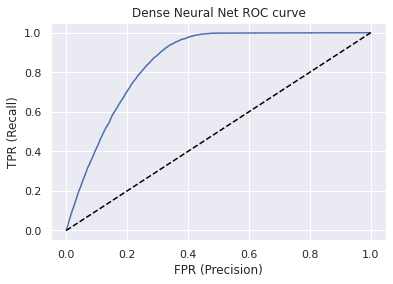

Area under curve (AUC):  0.8531121556168864


In [101]:
y_score = model.predict(x_test)[:,0]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Dense Neural Net ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))
# yields AUC of 0.855, very similar to random forest

### The Tensorflow dense neural net yields a very similar AUC to that of the random forest, 0.855 for both.
### XGBoost and Catboost are other programs similar to the random forest, not included in this notebook but available elsewhere for this dataset.

# Training of TF Model for Final Submission
### train_target has to be made 2-dimensional, just like y_train before.  All training data will be used, not split as it was for the foregoing model.

In [102]:
train_target2 = np.array([train_target,1-train_target])
train_target2 = np.transpose(train_target2)
train_target2

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

In [103]:
ratio = np.unique(train_target2[:,0], return_counts=True)[1][1]/len(train_target2)
EPOCHS = 10
BATCH_SIZE = 128

#n_cols = predictors.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)
class_weight = {0:1-ratio, 1:ratio-0.1}#{0:ratio, 1:1-ratio}

model = Sequential()
model.add(Dense(25, activation='relu', input_shape = (train.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train, train_target2, batch_size = BATCH_SIZE, epochs=EPOCHS, validation_split=0.1, #callbacks = [early_stopping_monitor],
          class_weight=class_weight)

Epoch 1/10
2680/2680 [==============================] - 5s 2ms/step - loss: 0.0323 - accuracy: 0.5927 - val_loss: 0.9611 - val_accuracy: 0.6056
Epoch 2/10
2680/2680 [==============================] - 5s 2ms/step - loss: 0.0309 - accuracy: 0.6061 - val_loss: 0.9331 - val_accuracy: 0.6162
Epoch 3/10
2680/2680 [==============================] - 5s 2ms/step - loss: 0.0308 - accuracy: 0.6084 - val_loss: 0.9493 - val_accuracy: 0.6126
Epoch 4/10
2680/2680 [==============================] - 5s 2ms/step - loss: 0.0307 - accuracy: 0.6089 - val_loss: 0.9605 - val_accuracy: 0.6022
Epoch 5/10
2680/2680 [==============================] - 5s 2ms/step - loss: 0.0306 - accuracy: 0.6099 - val_loss: 0.9617 - val_accuracy: 0.6109
Epoch 6/10
2680/2680 [==============================] - 5s 2ms/step - loss: 0.0305 - accuracy: 0.6107 - val_loss: 0.9471 - val_accuracy: 0.6104
Epoch 7/10
2680/2680 [==============================] - 5s 2ms/step - loss: 0.0305 - accuracy: 0.6112 - val_loss: 1.0182 - val_accuracy:

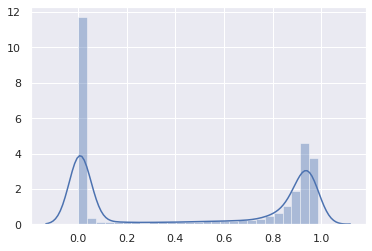

In [104]:
score = model.predict(test)[:,0]
sns.distplot(score)

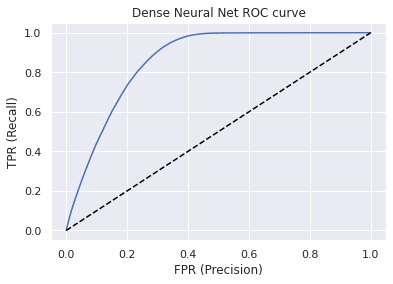

Area under curve (AUC):  0.861019247541397


In [105]:
y_score = model.predict(train)[:,0]
fpr, tpr, _ = roc_curve(train_target, y_score)

plt.title('Dense Neural Net ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))
# The AUC is 0.862 for the training data.  The test AUC is expected to be 0.855 as it was for the previous ROC where the model had not seen the test data.  
# The difference between 0.862 and 0.855 is small.  This is a good sign.  If overfitting had occurred, it would be much larger.

In [106]:
submission = pd.DataFrame(data = {'id': id, 'Response': score})
submission.to_csv('vehicle_insurance_tensorflow1.csv', index = False)
submission.head()

,id,Response
0,381110,0.027430
1,381111,0.955139
2,381112,0.944495
3,381113,0.233095
4,381114,0.013284


### This set of predictions will be evaluated on Kaggle after submission, and a ROC will be calculated and compared to that of other models.

<font size="+1" color='blue'><b> I hope you enjoyed this kernel , Please don't forget to appreciate me with an Upvote.</b></font>

<img src="https://i.pinimg.com/originals/e2/d7/c7/e2d7c71b09ae9041c310cb6b2e2918da.gif">